<a href="https://colab.research.google.com/github/vijayasri-manda/Data-Science/blob/main/SentimentAnalysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline
from subprocess import check_output

In [2]:
data = pd.read_csv('sentimentdataset.csv')

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
data=data[['Text','Sentiment']]

In [5]:
data

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
...,...,...
727,Collaborating on a science project that receiv...,Happy
728,Attending a surprise birthday party organized ...,Happy
729,Successfully fundraising for a school charity ...,Happy
730,"Participating in a multicultural festival, cel...",Happy


In [6]:
data.shape

(732, 2)

In [55]:
data['Sentiment'].unique()


array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [56]:
data["Sentiment"] = data["Sentiment"].str.strip()


In [57]:
data.head()


,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Positive


In [67]:
import pandas as pd
from textblob import TextBlob

# Sentiment labeling function
def get_sentiment(word):
    polarity = TextBlob(str(word)).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply to the column
data['Sentiment'] = data['Text'].apply(get_sentiment)

# Preview the results
print(data.head(20))


                                                 Text Sentiment
0    Enjoying a beautiful day at the park!        ...  positive
1    Traffic was terrible this morning.           ...  negative
2    Just finished an amazing workout! 💪          ...  positive
3    Excited about the upcoming weekend getaway!  ...  positive
4    Trying out a new recipe for dinner tonight.  ...  positive
5    Feeling grateful for the little things in lif...  negative
6    Rainy days call for cozy blankets and hot coc...  positive
7    The new movie release is a must-watch!       ...  positive
8    Political discussions heating up on the timel...   neutral
9    Missing summer vibes and beach days.         ...  negative
10   Just published a new blog post. Check it out!...  positive
11   Feeling a bit under the weather today.       ...   neutral
12   Exploring the city's hidden gems.            ...  negative
13   New year, new fitness goals! 💪               ...  positive
14   Technology is changing the way we l

In [68]:
data.isnull().sum()


,0
Text,0
Sentiment,0


In [69]:
# split the data into training, testing datasets
train, test = train_test_split(data,test_size = 0.1)

In [74]:
train = train[train.Sentiment !='neutral']


In [75]:
train

,Text,Sentiment
652,Successfully organized a surprise birthday par...,positive
263,"With a zestful heart, sprinting through field...",positive
420,Drowning in sorrow as memories of lost love re...,positive
89,A surprise visit from an old friend brought t...,positive
660,Accidentally liked my crush's old photo while ...,negative
...,...,...
362,Surprise and delight at discovering a hidden g...,negative
209,"Numb to the chaos, emotions locked away, a st...",negative
367,Happiness blooms like flowers in a garden on a...,positive
614,"Sipping on a favorite vintage wine, each sip t...",positive


In [76]:
train['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [81]:
train_positive = train[ train['Sentiment'] == 'positive']
train_positive = train_positive['Text']
train_negative = train[ train['Sentiment'] == 'negative']
train_negative = train_negative['Text']



In [82]:
train_positive

,Text
652,Successfully organized a surprise birthday par...
263,"With a zestful heart, sprinting through field..."
420,Drowning in sorrow as memories of lost love re...
89,A surprise visit from an old friend brought t...
122,Elation after a surprise reunion with old fri...
...,...
538,"Binge-watching a thrilling crime series, the s..."
374,Chasing dreams like a kite soaring high in the...
367,Happiness blooms like flowers in a garden on a...
614,"Sipping on a favorite vintage wine, each sip t..."


In [85]:
test_negative

,Text
187,Regret for decisions that led to a painful pr...
319,"Bitterness, a bitter chill in the air, freezi..."
299,"Yearning for a touch that's not there, echoes..."
462,"In the symphony of grief, each tear is a note,..."
55,The state of the world's environment is just ...
79,The state of corruption in our society is utt...
674,Accidentally sent a love letter to the wrong p...
242,"Embracing the beauty in imperfections, findin..."
1,Traffic was terrible this morning. ...
330,Shattered dreams lie on the floor like fragme...


Positive words


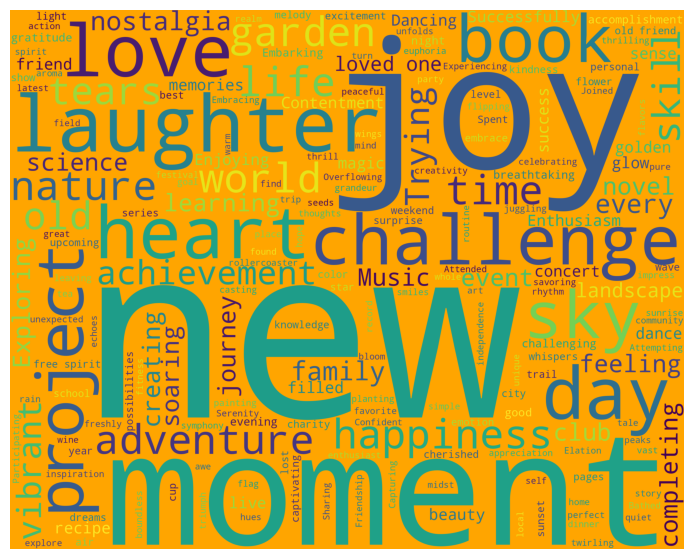

Negative words


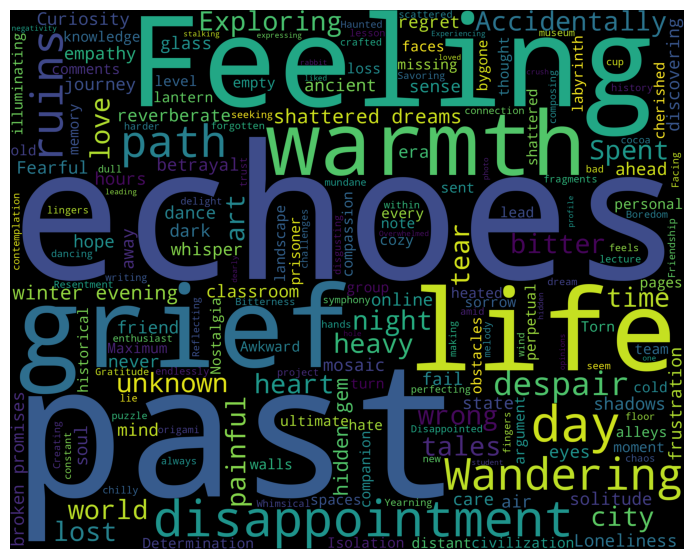

In [84]:
def wordcloud_draw(data,color='orange'):
  words=' '.join(data)
  cleaned_word=" ".join([word for word in words.split() if 'http' not in word and not word.split()])
  wordcloud=WordCloud(stopwords=STOPWORDS,background_color=color,width=2500,height=2000).generate(words)
  plt.figure(1,figsize=(10,7))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
print('Positive words')
wordcloud_draw(train_positive,'orange')
print('Negative words')
wordcloud_draw(train_negative,'black')

In [86]:
 import nltk
 nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
tweets=[]
stopwords_set=set(stopwords.words("english"))
for index,row in train.iterrows():
  words_filtered=[e.lower() for e in row.Text.split() if len(e)>=3]
  words_cleaned=[word for word in words_filtered if 'http' not in word and not word.startswith('@') and word!='RT']
  words_without_stopwords=[word for word in words_cleaned if not word in stopwords_set]
  tweets.append((words_without_stopwords,row.Sentiment))

In [91]:
test_positive = test[ test['Sentiment'] == 'positive']
test_positive = test_positive['Text']
test_negative = test[ test['Sentiment'] == 'negative']
test_negative = test_negative['Text']


In [92]:
# Extracting the features of words
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


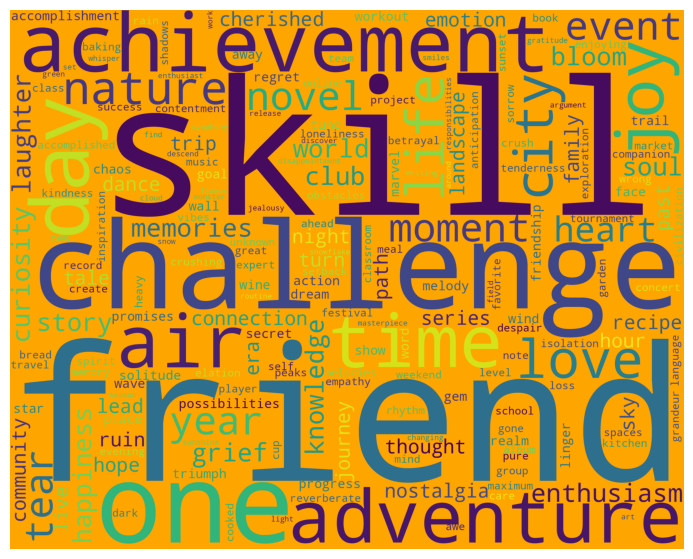

In [93]:
wordcloud_draw(w_features)

In [94]:
#using Naive Bayes classifier
training_set=nltk.classify.apply_features(extract_features,tweets)
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [95]:
classifier.show_most_informative_features(20)


Most Informative Features
     contains(shattered) = True           negati : positi =      9.4 : 1.0
        contains(warmth) = True           negati : positi =      9.4 : 1.0
        contains(hidden) = True           negati : positi =      7.9 : 1.0
        contains(winter) = True           negati : positi =      7.9 : 1.0
           contains(new) = True           positi : negati =      6.8 : 1.0
        contains(bitter) = True           negati : positi =      6.5 : 1.0
        contains(echoes) = True           negati : positi =      5.9 : 1.0
         contains(fail:) = True           negati : positi =      5.0 : 1.0
          contains(path) = True           negati : positi =      5.0 : 1.0
        contains(dreams) = True           negati : positi =      4.8 : 1.0
      contains(comments) = True           negati : positi =      3.6 : 1.0
          contains(dark) = True           negati : positi =      3.6 : 1.0
       contains(despair) = True           negati : positi =      3.6 : 1.0

**Train Set**

In [99]:
negative_count=0
positive_count=0
for object in train_negative:
  res=classifier.classify(extract_features(object.split()))
  if(res=='negative'):
    negative_count=negative_count+1
for object in train_positive:
  res=classifier.classify(extract_features(object.split()))
  if(res=='positive'):
    positive_count=positive_count+1
print('Negative',(len(train_negative),negative_count))
print('positive',(len(train_positive),positive_count))


Negative (116, 111)
positive (252, 251)


**Test Set**

In [100]:
# negative_count = 0
positive_count = 0
for object in test_negative:
  res = classifier.classify(extract_features(object.split()))
  if(res == 'negative'):
    negative_count = negative_count + 1
for object in test_positive:
  res = classifier.classify(extract_features(object.split()))
  if(res == 'positive'):
    positive_count = positive_count + 1
print('[negative]: %s/%s '% (len(test_negative),negative_count))
print('[positive]: %s/%s '% (len(test_positive),positive_count))


[negative]: 10/113 
[positive]: 30/29 
